<a href="https://colab.research.google.com/github/azimhims/azimhims/blob/main/Welcome_To_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
#i want to integer encoding with the help of keras
from tensorflow.keras.preprocessing.text import Tokenizer


In [28]:
text = ['hello !', 'data science and artificial integligence with chatgpt', 'and llm model using hugging face and langchain']

In [31]:
tokenizer = Tokenizer(oov_token='<nothing>')
import numpy as np

In [32]:
tokenizer.fit_on_texts(text)

In [33]:
tokenizer.word_index

{'<nothing>': 1,
 'and': 2,
 'hello': 3,
 'data': 4,
 'science': 5,
 'artificial': 6,
 'integligence': 7,
 'with': 8,
 'chatgpt': 9,
 'llm': 10,
 'model': 11,
 'using': 12,
 'hugging': 13,
 'face': 14,
 'langchain': 15}

In [34]:
# now need to check word count in given tokenzier
tokenizer.word_counts

OrderedDict([('hello', 1),
             ('data', 1),
             ('science', 1),
             ('and', 3),
             ('artificial', 1),
             ('integligence', 1),
             ('with', 1),
             ('chatgpt', 1),
             ('llm', 1),
             ('model', 1),
             ('using', 1),
             ('hugging', 1),
             ('face', 1),
             ('langchain', 1)])

In [35]:
tokenizer.document_count

3

In [37]:
sequence = tokenizer.texts_to_sequences(text)
sequence

[[3], [4, 5, 2, 6, 7, 8, 9], [2, 10, 11, 12, 13, 14, 2, 15]]

In [38]:
from keras.utils import pad_sequences

In [43]:
sequences = pad_sequences(sequence, padding='post')

In [44]:
sequences

array([[ 3,  0,  0,  0,  0,  0,  0,  0],
       [ 4,  5,  2,  6,  7,  8,  9,  0],
       [ 2, 10, 11, 12, 13, 14,  2, 15]], dtype=int32)

In [45]:
from keras.datasets import imdb
from keras import Sequential
from keras.layers import Dense, SimpleRNN, Embedding, Flatten

In [74]:
(X_train,y_train),(X_test, y_test) = imdb.load_data()

In [75]:
X_train

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1

In [76]:
X_train = pad_sequences(X_train, padding='post', maxlen=50)
X_test = pad_sequences(X_test, padding='post', maxlen=50)

In [78]:
X_train.shape

(25000, 50)

### you need to know the maximum word index of train datasets before  building sequential model

In [87]:
max_index = X_train.max()
print(f"Maximum word index: {max_index}")

Maximum word index: 88585


In [88]:
model = Sequential()
model.add(Embedding(input_dim=max_index + 1, output_dim=3, input_length=50))
model.add(SimpleRNN(32, return_sequences=False))
model.add(Dense(1, activation='sigmoid'))
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_4 (SimpleRNN)             │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [95]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))


Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 18s 20ms/step - accuracy: 0.9782 - loss: 0.0671 - val_accuracy: 0.7718 - val_loss: 0.7303
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - accuracy: 0.9865 - loss: 0.0425 - val_accuracy: 0.7696 - val_loss: 0.8804
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 22s 25ms/step - accuracy: 0.9915 - loss: 0.0282 - val_accuracy: 0.7680 - val_loss: 1.0367
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 22s 26ms/step - accuracy: 0.9925 - loss: 0.0245 - val_accuracy: 0.7481 - val_loss: 0.9309
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 40s 25ms/step - accuracy: 0.9943 - loss: 0.0192 - val_accuracy: 0.7599 - val_loss: 1.0440


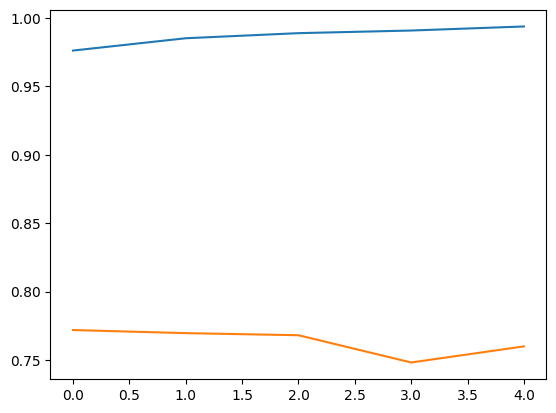

In [96]:
from matplotlib import pyplot as plt
# need to check in graphical form  for train and validation,  accurcy and loss and prediction
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])


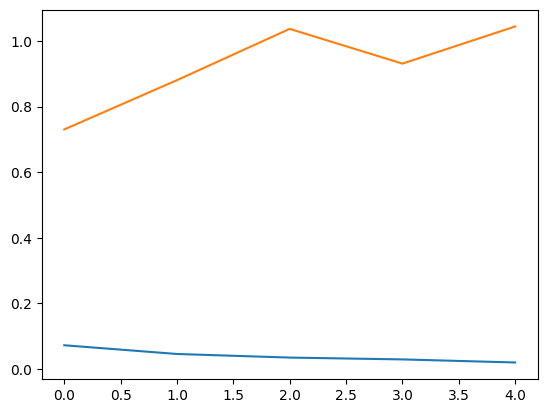

In [97]:
# now check the gap of train and validation
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [101]:
# now check the positive and negative sentiments
model.predict(X_test[1:2])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


array([[0.00198674]], dtype=float32)

In [100]:
# how to display  either positive remarks or negative
if model.predict(X_test[1:2]) > 0.8:
    print('positive')
else:
    print('negative')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
negative
